In [44]:
import json
import os
import time
from AxonDeepSeg.train_network import train_model


import tensorflow as tf
tf.reset_default_graph()


In [45]:
filename = '/config_network.json'
trainingset_name = 'SEM_3c_256'
path_training = '/Users/rudinakaprata/Dropbox/SEM_3c_256/training'

Toy example:
* All convolutions kernels are 3x3
* Max pooling is used to downsample the feature maps
* 2 convoluation layers per depth (i.e. Conv-Conv-Downsample-Conv-Conv-Downsample-...)
* Number of feature channels: 5, then 10, then 15.


In [46]:
config = {
    
# General parameters:    
  "n_classes": 3,
  "thresholds": [0, 0.2, 0.8],    
  "trainingset_patchsize": 256,    
  "trainingset": "SEM_3c_256",    
  "batch_size": 8,
     
# Learning rate parameters:    
  "learning_rate": 0.001,    
  "learning_rate_decay_activate": True,    
  "learning_rate_decay_period": 24000, 
  "learning_rate_decay_type": "polynomial", 
  "learning_rate_decay_rate": 0.99,
    
# Batch normalization parameters:     
  "batch_norm_activate": True,     
  "batch_norm_decay_decay_activate": True,    
  "batch_norm_decay_starting_decay": 0.7, 
  "batch_norm_decay_ending_decay": 0.9, 
  "batch_norm_decay_decay_period": 16000,
        
# Network architecture parameters:     
  "depth": 2,
  "convolution_per_layer": [2, 2],
  "size_of_convolutions_per_layer": [[3, 3], [3, 3]],
  "features_per_convolution": [[[1, 5], [5, 5]], [[5, 10], [10, 10]]],
  "downsampling": "maxpooling",
  "dropout": 0.75, 
       
# Weighted cost parameters:    
  "weighted_cost-activate": True, 
  "weighted_cost-balanced_activate": True, 
  "weighted_cost-balanced_weights": [1.1, 1, 1.3], 
  "weighted_cost-boundaries_sigma": 2, 
  "weighted_cost-boundaries_activate": False, 
    
# Data augmentation parameters:    
  "da-type": "all", 
  "da-2-random_rotation-activate": False, 
  "da-5-noise_addition-activate": False, 
  "da-3-elastic-activate": True, 
  "da-0-shifting-activate": True, 
  "da-4-flipping-activate": True, 
  "da-1-rescaling-activate": False,
 
  "dataset_mean": 128,
  "dataset_variance": 30,
    
}


In [47]:
# Create subfolder to save model and its params

dir_name = time.strftime("%Y-%m-%d") + '_' + time.strftime("%H-%M-%S") 
path_model = os.path.join('../models/', dir_name)

if not os.path.exists(path_model):
    os.makedirs(path_model)

In [48]:
# Save config params of the network as configuration file (.json)

if os.path.exists(path_model+filename):
    with open(path_model+filename, 'r') as fd:
        config_network = json.loads(fd.read())
else: # There is no config file for the moment
    with open(path_model+filename, 'w') as f:
        json.dump(config, f, indent=2)
    with open(path_model+filename, 'r') as fd:
        config_network = json.loads(fd.read())

In [49]:
# Launch the training step
train_model(path_training, path_model, config)

KeyError: 'dataset_mean'

In [14]:
import numpy as np
from skimage import io
from scipy.misc import imread, imsave
import os
import imageio
import json
import matplotlib.pyplot as plt
from shutil import copy
from scipy.misc import imread, imsave

from AxonDeepSeg.apply_model import axon_segmentation

In [15]:
# Path of image to segment with trained model

path_img = '/Users/rudinakaprata/Documents/Aldo/ads_feb/axondeepseg/AxonDeepSeg/data_test/image.png'

In [16]:
img = imageio.imread(path_img)
path_folder, file_name = os.path.split(path_img)

model_name = '2018-06-04_16-44-36'
path_model = os.path.join('..','models',model_name)
path_configfile = os.path.join(path_model,'config_network.json')
with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())
    
mask = imageio.imread(os.path.join(path_folder,'mask.png'))
gt_axon = mask > 200
gt_axon = gt_axon[:,:,0]
gt_myelin = np.logical_and(mask >= 50, mask <= 200)
gt_myelin = gt_myelin[:,:,0]

In [21]:
print(file_name)

image.png


In [17]:
import tensorflow as tf
tf.reset_default_graph()

prediction = axon_segmentation(path_folder, file_name, path_model, config_network,verbosity_level=3)







Loading acquisitions ...
Rescaling acquisitions to the target resolution ...
Graph construction ...
Beginning inference ...
processing patch 1 of 20
processing patch 2 of 20
processing patch 3 of 20
processing patch 4 of 20
processing patch 5 of 20
processing patch 6 of 20
processing patch 7 of 20
processing patch 8 of 20
processing patch 9 of 20
processing patch 10 of 20
processing patch 11 of 20
processing patch 12 of 20
processing patch 13 of 20
processing patch 14 of 20
processing patch 15 of 20
processing patch 16 of 20
processing patch 17 of 20
processing patch 18 of 20
processing patch 19 of 20
processing patch 20 of 20


TypeError: Invalid dimensions for image data

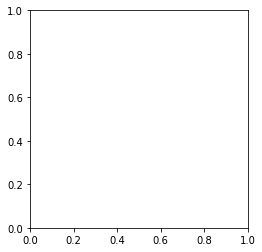

In [24]:
plt.imshow(prediction)

In [35]:
print(prediction)

[array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 2, 2, 1],
       [1, 1, 1, ..., 2, 2, 1],
       ...,
       [1, 2, 2, ..., 2, 2, 1],
       [1, 2, 2, ..., 2, 2, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)]


TypeError: Invalid dimensions for image data

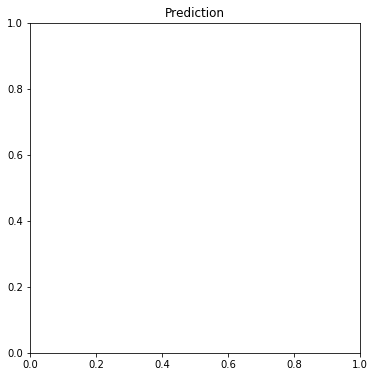

In [54]:
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('Prediction')
plt.imshow(prediction,cmap='gray')

In [8]:
a='weighted_cost'
key1, key2 = a.split('_')
print(key1,key2)

('weighted', 'cost')


In [4]:
from AxonDeepSeg.train_network_tools import *

data_augmentation = generate_dict_da(config)
print(data_augmentation)



{'random_rotation': {'activate': False, 'order': '2'}, 'elastic': {'activate': True, 'order': '3'}, 'flipping': {'activate': True, 'order': '4'}, 'shifting': {'activate': True, 'order': '0'}, 'noise_addition': {'activate': False, 'order': '5'}, 'rescaling': {'activate': False, 'order': '1'}, 'type': 'all'}


In [22]:
weights_modifier = generate_dict_weights(config)
print(weights_modifier)

{'boundaries_activate': False, 'balanced_weights': [1.1, 1, 1.3], 'activate': True, 'boundaries_sigma': 2, 'balanced_activate': True}


In [ ]:
config = {
  "learning_rate_decay_period": 24000, 
  "batch_norm_decay_decay_period": 16000, 
  "learning_rate_decay_type": "polynomial", 
  "batch_norm_decay_decay_activate": True, 
  "learning_rate_decay_activate": True, 
  "learning_rate_decay_rate": 0.99, 
  "batch_norm_decay_ending_decay": 0.9, 
  "depth": 3, 
  "weighted_cost_activate": False, 
  "weighted_cost_balanced_activate": False, 
  "weighted_cost_balanced_weights": [1, 1], 
  "weighted_cost_boundaries_sigma": 2, 
  "weighted_cost_boundaries_activate": False,
  "batch_norm_activate": True, 
  "thresholds": [0, 0.5], 
  "trainingset_patchsize": 512, 
  "learning_rate": 0.001, 
  "downsampling": "maxpooling", 
  "batch_size": 8, 
  "da-type": "all", 
  "n_classes": 2, 
  "batch_norm_decay_starting_decay": 0.7, 
  "trainingset": "data_training", 
  "size_of_convolutions_per_layer": [[3,3],[3,3],[3,3],[3,3]], 
  "dropout": 0.75, 
  "convolution_per_layer": [2, 2, 2], 
  "features_per_convolution": [[[10,15],[15,20]],[[20,25],[25,30]],[[30,35],[35,40]]]
}

In [13]:
config = {
  "learning_rate_decay_period": 24000, 
  "batch_norm_decay_decay_period": 16000, 
  "learning_rate_decay_type": "polynomial", 
  "batch_norm_decay_decay_activate": True, 
  "learning_rate_decay_activate": True, 
  "learning_rate_decay_rate": 0.99, 
  "batch_norm_decay_ending_decay": 0.9, 
  "depth": 4, 
  "weighted_cost_activate": True, 
  "weighted_cost_balanced_activate": True, 
  "weighted_cost_balanced_weights": [1.1, 1, 1.3], 
  "weighted_cost_boundaries_sigma": 2, 
  "weighted_cost_boundaries_activate": False,
  "batch_norm_activate": True, 
  "thresholds": [0, 0.2, 0.8], 
  "trainingset_patchsize": 512, 
  "learning_rate": 0.001, 
  "downsampling": "convolution", 
  "batch_size": 8, 
  "da-type": "all", 
  "da-random_rotation-activate": False, 
  "da-noise_addition-activate": False, 
  "da-elastic-activate": True, 
  "da-shifting-activate": True, 
  "da-flipping-activate": True, 
  "da-rescaling-activate": False,
  "n_classes": 3, 
  "batch_norm_decay_starting_decay": 0.7, 
  "trainingset": "SEM_3c_512", 
  "size_of_convolutions_per_layer": [[5, 5, 5], [3, 3, 3], [3, 3, 3], [3, 3, 3]], 
  "dropout": 0.75, 
  "convolution_per_layer": [3, 3, 3, 3], 
  "features_per_convolution": [[[1, 16], [16, 16], [16, 16]], 
                               [[16, 32], [32, 32], [32, 32]], 
                               [[32, 64], [64, 64], [64, 64]], 
                               [[64, 128], [128, 128], [128, 128]]]
}

In [7]:
print(config)

{'learning_rate_decay_period': 24000, 'trainingset_patchsize': 256, 'thresholds': [0, 0.2, 0.8], 'batch_norm_decay_decay_period': 16000, 'learning_rate_decay_type': 'polynomial', 'da-type': 'all', 'batch_size': 8, 'convolution_per_layer': [2, 2, 2, 2], 'da-random_rotation-activate': False, 'features_per_convolution': [[[1, 5], [5, 5]], [[5, 10], [10, 10]], [[10, 15], [15, 15]], [[15, 20], [20, 20]]], 'batch_norm_activate': True, 'learning_rate_decay_rate': 0.99, 'batch_norm_decay_ending_decay': 0.9, 'da-shifting-activate': True, 'weighted_cost-balanced_weights': [1.1, 1, 1.3], 'dataset_variance': 30, 'learning_rate': 0.001, 'da-elastic-activate': True, 'da-noise_addition-activate': False, 'weighted_cost-activate': True, 'dataset_mean': 128, 'downsampling': 'maxpooling', 'size_of_convolutions_per_layer': [[3, 3], [3, 3], [3, 3], [3, 3]], 'weighted_cost-boundaries_sigma': 2, 'weighted_cost-boundaries_activate': False, 'batch_norm_decay_decay_activate': True, 'depth': 4, 'da-flipping-acti

In [ ]:
config = {
  "learning_rate_decay_period": 24000, 
  "batch_norm_decay_decay_period": 16000, 
  "learning_rate_decay_type": "polynomial", 
  "batch_norm_decay_decay_activate": True, 
  "learning_rate_decay_activate": True, 
  "learning_rate_decay_rate": 0.99, 
  "batch_norm_decay_ending_decay": 0.9, 
  "depth": 3, 
  "weighted_cost_activate": False, 
  "weighted_cost_balanced_activate": False,  
  "weighted_cost_boundaries_activate": False,
  "batch_norm_activate": True, 
  "thresholds": [0, 0.5], 
  "trainingset_patchsize": 512, 
  "learning_rate": 0.001, 
  "downsampling": "maxpooling", 
  "batch_size": 8, 
  "da-type": "all", 
  "n_classes": 2, 
  "batch_norm_decay_starting_decay": 0.7, 
  "trainingset": "data_training", 
  "size_of_convolutions_per_layer": [[3,3],[3,3],[3,3],[3,3]], 
  "dropout": 0.75, 
  "convolution_per_layer": [2, 2, 2], 
  "features_per_convolution": [[[10,15],[15,20]],[[20,25],[25,30]],[[30,35],[35,40]]]
}

[44 44 44]
[44 44 44]


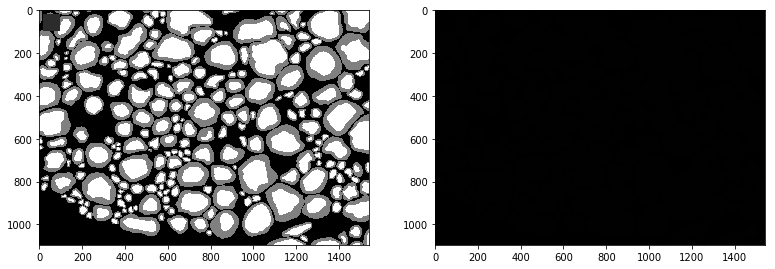

In [12]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
from AxonDeepSeg.data_management.input_data import labellize_mask_2d



mask = imageio.imread('/Users/rudinakaprata/Documents/Aldo/ads_feb/axondeepseg/AxonDeepSeg/data_test/mask.png')




mask[20:100,20:100,:]=300
mask2, aaa = labellize_mask_2d(mask, [0,0.5])

plt.figure(figsize=(13,10))
plt.subplot(121)
plt.imshow(mask)
plt.subplot(122)
plt.imshow(aaa)

print(mask[20,20,:])
print(mask2[20,20,:])

In [5]:
print(aaa)

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [ ]:
the one that works

In [ ]:
config = {
  "learning_rate_decay_period": 24000, 
  "batch_norm_decay_decay_period": 16000, 
  "learning_rate_decay_type": "polynomial", 
  "batch_norm_decay_decay_activate": True, 
  "learning_rate_decay_activate": True, 
  "learning_rate_decay_rate": 0.99, 
  "batch_norm_decay_ending_decay": 0.9, 
  "depth": 2, 
  "weighted_cost-activate": True, 
  "weighted_cost-balanced_activate": True, 
  "weighted_cost-balanced_weights": [1.1, 1, 1.3], 
  "weighted_cost-boundaries_sigma": 2, 
  "weighted_cost-boundaries_activate": False, 
  "batch_norm_activate": True, 
  "thresholds": [0, 0.2, 0.8], 
  "trainingset_patchsize": 256, 
  "learning_rate": 0.001, 
  "downsampling": "maxpooling", 
  "batch_size": 8, 
  "da-type": "all", 
  "da-random_rotation-activate": False, 
  "da-noise_addition-activate": False, 
  "da-elastic-activate": True, 
  "da-shifting-activate": True, 
  "da-flipping-activate": True, 
  "da-rescaling-activate": False,
  "n_classes": 3, 
  "batch_norm_decay_starting_decay": 0.7, 
  "dataset_mean": 128,
  "dataset_variance": 30,
  "trainingset": "SEM_3c_256", 
  "size_of_convolutions_per_layer": [[3, 3], [3, 3]], 
  "dropout": 0.75, 
  "convolution_per_layer": [2, 2], 
  "features_per_convolution": [[[1, 5], [5, 5]], 
                               [[5, 10], [10, 10]]]
}